# **Problem Statement:

You are an independent trainer who would like to pitch your Data Science training program to a set of Engineering collages. You have data of 26 collages after survey using questionnaires. Each collage has been given a score for 5 performance criteria-Teaching, Fees, Placement, Internship & Infrastructure. Ratings are in the standardized scale of 1 to 5 where 5 has a higher weightage than 1. Segment the collages into groups and come up with your pitch recommendations for each segment.

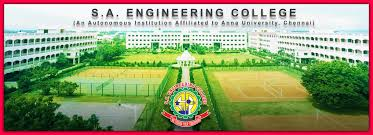

# Data Disctionary:
    1. SR_NO: Serial number of students
    2. Engg_College: Ranking of the Engineering College
    3. Teaching: Teaching 
    4. Fees: Fee structure of the course
    5. Placements: Placement of the college
    6. Internship: Internship
    7. Infrastructure: Infrastrusture of the college

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')


In [8]:
#Read Engineering_College_Dataset.
df = pd.read_csv('Engg_College_Data.csv')

In [10]:
df.head(5) #View first 5 rows.

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [11]:
df.tail(5) #View the last 5 rows.

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
21,22,V,2,2,1,2,1
22,23,W,2,5,1,1,1
23,24,X,1,1,1,2,5
24,25,Y,1,1,1,1,5
25,26,Z,3,4,5,2,3


In [14]:
df.info() #Checking Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [18]:
df.shape
print('Number of rows' )
print('Number of coulmns')

Number of rows
Number of coulmns


In [21]:
df.dtypes #To check the datatype of the individual feature.

SR_NO              int64
Engg_College      object
Teaching           int64
Fees               int64
Placements         int64
Internship         int64
Infrastructure     int64
dtype: object

In [25]:
df.isnull().any().sum() #To check any missing values in the dataset.

0

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SR_NO,26.0,13.500000,7.648529,1.0,7.25,13.5,19.75,26.0
Teaching,26.0,2.807692,1.132051,1.0,2.00,3.0,3.00,5.0
Fees,26.0,3.576923,1.331858,1.0,2.25,4.0,5.00,5.0
Placements,26.0,2.884615,1.531716,1.0,1.25,3.0,4.00,5.0
Internship,26.0,2.769231,1.242826,1.0,2.00,2.0,4.00,5.0
Infrastructure,26.0,3.384615,1.298520,1.0,3.00,3.0,4.75,5.0


In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SR_NO,26.0,NaN,NaN,NaN,13.5,7.648529,1.0,7.25,13.5,19.75,26.0
Engg_College,26,26,Z,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teaching,26.0,NaN,NaN,NaN,2.807692,1.132051,1.0,2.0,3.0,3.0,5.0
Fees,26.0,NaN,NaN,NaN,3.576923,1.331858,1.0,2.25,4.0,5.0,5.0
Placements,26.0,NaN,NaN,NaN,2.884615,1.531716,1.0,1.25,3.0,4.0,5.0
Internship,26.0,NaN,NaN,NaN,2.769231,1.242826,1.0,2.0,2.0,4.0,5.0
Infrastructure,26.0,NaN,NaN,NaN,3.384615,1.29852,1.0,3.0,3.0,4.75,5.0


In [34]:
df.duplicated().sum() #To check any duplicate in the dataset.

0

<AxesSubplot:>

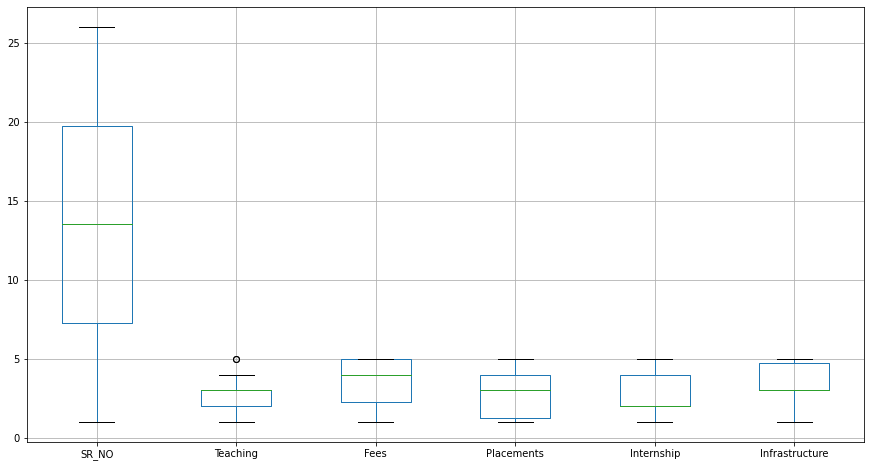

In [40]:
#Boxplot
plt.figure(figsize=(15,8))
df.boxplot()

In [53]:
df.drop('SR_NO', axis = 1, inplace=True)

In [54]:
df.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5


# Creating the Dendrogram

Importing dendrogram and linkage module

In [55]:
from scipy.cluster.hierarchy import dendrogram,linkage

Choosing average linkage method

In [62]:
link_method = linkage(df.iloc[:,1:6], method = 'average')

In [58]:
link_method

array([[ 9.        , 10.        ,  0.        ,  2.        ],
       [ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 5.        , 13.        ,  1.        ,  2.        ],
       [17.        , 18.        ,  1.        ,  2.        ],
       [11.        , 19.        ,  1.        ,  2.        ],
       [20.        , 21.        ,  1.        ,  2.        ],
       [14.        , 15.        ,  1.        ,  2.        ],
       [23.        , 24.        ,  1.        ,  2.        ],
       [16.        , 32.        ,  1.20710678,  3.        ],
       [ 3.        ,  8.        ,  1.41421356,  2.        ],
       [ 2.        ,  7.        ,  1.41421356,  2.        ],
       [26.        , 28.        ,  1.57313218,  4.        ],
       [25.        , 29.        ,  1.57313218,  3.        ],
       [35.        , 36.        ,  1.73205081,  4.        ],
       [12.        , 22.        ,  1.73205081,  2.        ],
       [30.        , 38.        ,  1.92731215,  5.        ],
       [ 6.        , 31.

In [60]:
labelList = np.array(df.Engg_College)
labelList

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

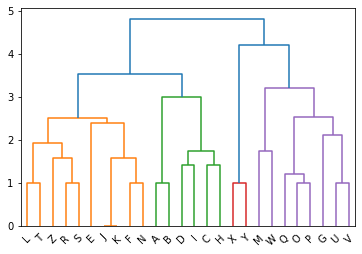

In [63]:
dend = dendrogram(link_method,labels = labelList)

# Cutting the Dendrogram with suitable clusters

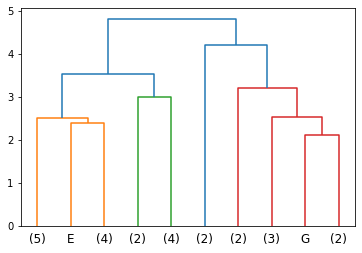

In [64]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 labels = labelList 
                 )

# Importing fcluster module to create clusters

In [65]:
from scipy.cluster.hierarchy import fcluster

In [66]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 2, 2, 1], dtype=int32)

Appending clusters to original dataset

In [68]:
df['clusters']=clusters

In [70]:
df.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
0,A,5,2,5,5,3,1
1,B,4,2,5,5,3,1
2,C,4,5,5,4,5,1
3,D,5,4,5,4,4,1
4,E,2,5,2,2,5,1


# Cluster Frequency

In [72]:
df.clusters.value_counts().sort_index()

1    16
2     2
3     8
Name: clusters, dtype: int64

Cluster 1: Tier 1 colleges (Top Colleges)
Cluster 2: Tier 3 colleges (Poor performing colleges/new college)
Cluster 3: Tier 2 colleges (Medium performing colleges)